/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1850 - loss: 2.2766 - val_accuracy: 0.3112 - val_loss: 1.9402
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2422 - loss: 2.0210 - val_accuracy: 0.3145 - val_loss: 1.9280
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2488 - loss: 1.9903 - val_accuracy: 0.2991 - val_loss: 1.9435
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2611 - loss: 1.9628 - val_accuracy: 0.3237 - val_loss: 1.9322
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2689 - loss: 1.9420 - val_accuracy: 0.3269 - val_loss: 1.9171
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2864 - loss: 1.9211 - val_accuracy: 0.3183 - val_loss: 1.9362
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2830 - loss: 1.9166 - val_accuracy: 0.3311 - val_loss: 1.9193
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2904 - loss: 1.8966 - val_accuracy: 0.

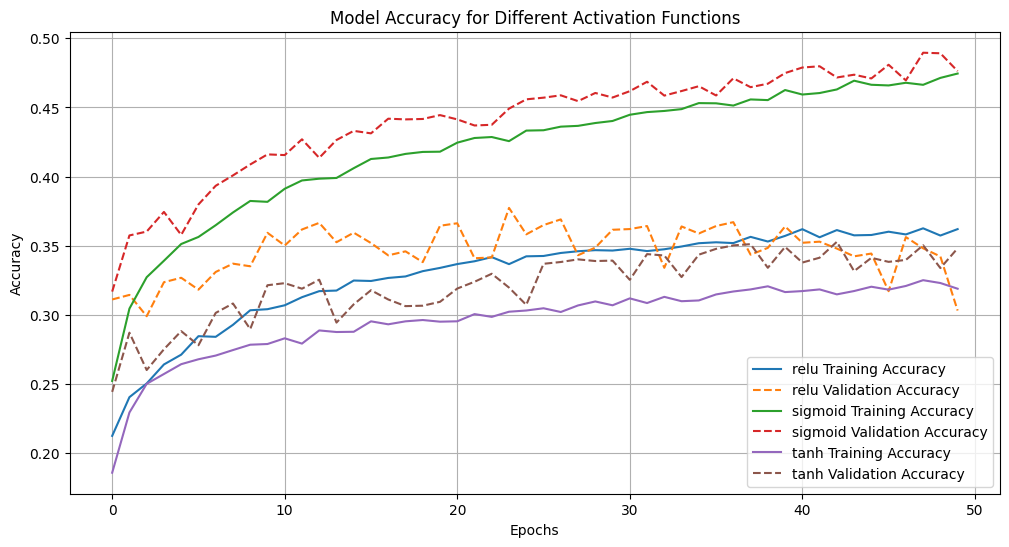

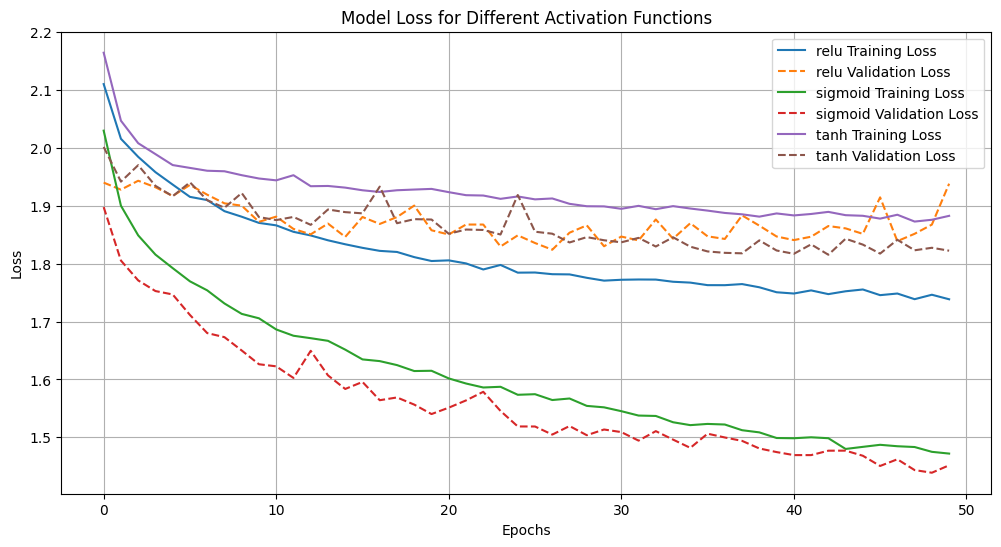

Test Loss: 1.8010
Test Accuracy: 0.3543
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

    Airplane       0.38      0.44      0.41      1000
  Automobile       0.40      0.47      0.43      1000
        Bird       0.27      0.12      0.17      1000
         Cat       0.20      0.23      0.21      1000
        Deer       0.38      0.14      0.21      1000
         Dog       0.31      0.31      0.31      1000
        Frog       0.35      0.56      0.43      1000
       Horse       0.41      0.36      0.38      1000
        Ship       0.46      0.43      0.45      1000
       Truck       0.38      0.47      0.42      1000

    accuracy                           0.35     10000
   macro avg       0.35      0.35      0.34     10000
weighted avg       0.35      0.35      0.34     10000



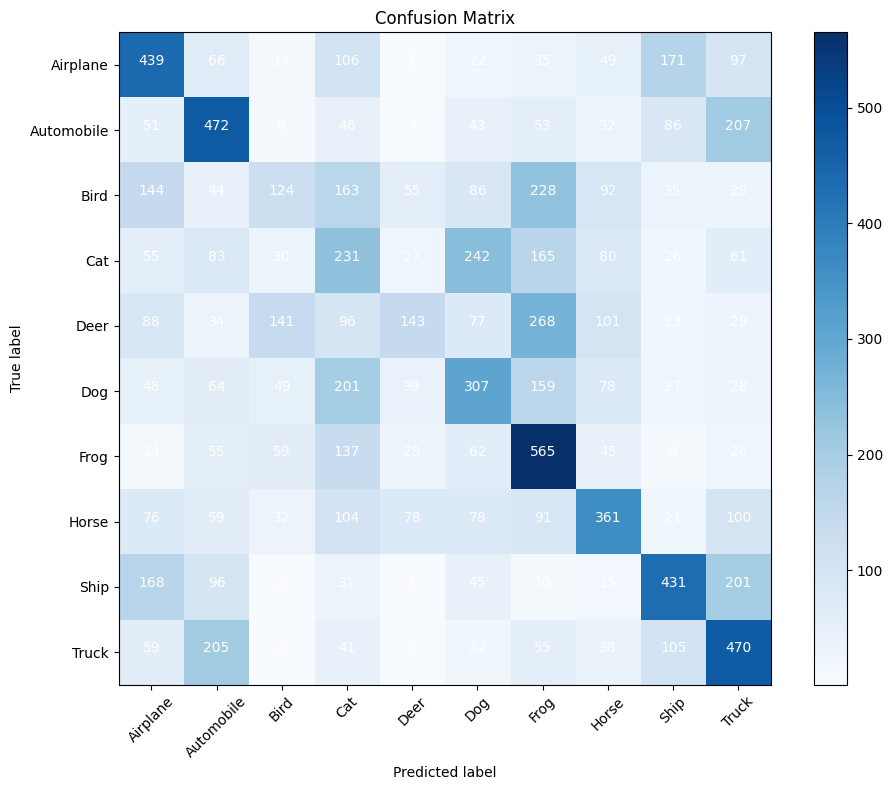

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from tensorflow.keras.optimizers import Adam

# 1. Data Preprocessing
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert class labels to one-hot encoded format
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define activation functions to test
activation_functions = ['relu', 'sigmoid', 'tanh']
histories = {}

# Define learning rate
learning_rate = 0.001  # You can adjust this as needed

# 2. Network Architecture Design and Training
for activation in activation_functions:
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))  # Flatten the input
    model.add(Dense(512, activation=activation, kernel_initializer='he_normal', bias_initializer='zeros'))  # Hidden layer with specified activation
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(256, activation=activation, kernel_initializer='he_normal', bias_initializer='zeros'))  # Second hidden layer with specified activation
    model.add(Dense(10, activation='softmax'))  # Output layer with softmax activation

    # Compile the model with a specified learning rate
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)
    histories[activation] = history  # Store history for plotting

# 6. Model Evaluation and Visualization
plt.figure(figsize=(12, 6))

# Plot Accuracy
for activation in activation_functions:
    plt.plot(histories[activation].history['accuracy'], label=f'{activation} Training Accuracy')
    plt.plot(histories[activation].history['val_accuracy'], label=f'{activation} Validation Accuracy', linestyle='--')

plt.title('Model Accuracy for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(12, 6))
for activation in activation_functions:
    plt.plot(histories[activation].history['loss'], label=f'{activation} Training Loss')
    plt.plot(histories[activation].history['val_loss'], label=f'{activation} Validation Loss', linestyle='--')

plt.title('Model Loss for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Evaluate the last model with 'relu' activation
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate predictions on the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels
y_test_classes = np.argmax(y_test, axis=1)  # Get true class labels

# Calculate precision, recall, F1-score
report = classification_report(y_test_classes, y_pred_classes, target_names=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
])
print("Classification Report:\n", report)

# Confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'], rotation=45)
plt.yticks(tick_marks, ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'])

# Normalize the confusion matrix
threshold = test_accuracy / 2  # For better readability
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, f"{conf_matrix[i, j]}",
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > threshold else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


**Q.Justify your choice of network architecture, including the number of
layers, types of layers, and the number of neurons/filters in each layer.**

Network Architecture Justification:

Number of Layers and Neurons:

Input Layer (Flatten): The CIFAR-10 images are 32x32x3 (RGB), and the Flatten layer converts this into a 1D vector of size 3072 (32 * 32 * 3). This is necessary for connecting the image data to the fully connected layers.

Hidden Layers:

First Dense Layer (512 neurons, ReLU): This layer has 512 neurons, which gives the network enough capacity to learn complex patterns from the image data. The use of the ReLU activation function introduces non-linearity, which helps in learning more intricate patterns.

Second Dense Layer (256 neurons, ReLU): The second hidden layer reduces the number of neurons to 256. This introduces a form of regularization (reducing model complexity) while still retaining the network's ability to learn relevant features.

Dropout Layer (50%): Dropout is applied after the first hidden layer to reduce overfitting by randomly setting 50% of the neurons to zero during training. This forces the model to generalize better by preventing reliance on specific neurons.

Output Layer (10 neurons, Softmax): The output layer has 10 neurons (one for each class in CIFAR-10) and uses the Softmax activation function. This activation is appropriate for multi-class classification problems, as it produces a probability distribution over the classes.

Why This Architecture?

The two fully connected layers with decreasing neuron counts help the model extract increasingly refined features as it progresses from input to output. The use of dropout helps in regularization, and the softmax output layer allows for a probability-based prediction across the 10 classes.

**How does the choice of optimizer and learning rate influence the
convergence of the network? How would you adjust the learning rate if the
model is not converging properly?**

**Optimizer and Learning Rate Impact:**

Choice of Optimizer: Adam is used as the optimizer because it combines the advantages of two other optimizers (AdaGrad and RMSProp). Adam adapts the learning rate for each parameter, making it well-suited for problems with noisy gradients and sparse data. This helps in faster convergence and better performance on complex tasks like image classification.

Influence of Learning Rate on Convergence: The learning rate controls the step size during weight updates. A high learning rate may cause the model to overshoot the optimal weights, leading to poor performance. Conversely, a very low learning rate may slow down convergence and cause the model to get stuck in local minima. If the model isn't converging, reducing the learning rate can help the model find the optimal weights more gradually. Learning rate schedules or manually lowering the learning rate can adjust the learning speed over time.

**How does backpropagation update the weights in each layer, and what
role does the learning rate play in this process?**

Backpropagation is a training algorithm for neural networks that updates weights based on the error of predictions. Here’s a concise overview:

Forward Pass: Input data flows through the network, producing an output.

Loss Calculation: The output is compared to the true labels using a loss function to compute the error.

Backward Pass:

Calculate Gradients: The gradient of the loss with respect to each weight is computed using the chain rule.
Weight Update: Weights are adjusted to minimize the loss using the rule:
𝑤
=
𝑤
−
𝜂
⋅
∂
𝐿
∂
𝑤
w=w−η⋅
∂w
∂L
​

Where
𝑤
w is the weight,
𝜂
η is the learning rate, and
∂
𝐿
∂
𝑤
∂w
∂L
​
  is the gradient.

Role of Learning Rate:
Small Learning Rate: Slower convergence; may get stuck in local minima.
Large Learning Rate: Faster initial convergence but risks overshooting and divergence.

How can you further improve model performance if the accuracy is low?

1. Data Augmentation: Increase dataset diversity through transformations (e.g., rotation, flipping) to help generalize better.

2. Hyperparameter Tuning: Experiment with learning rates, batch sizes, and network architecture for optimal settings.

3. Regularization: Use techniques like dropout or L1/L2 regularization to prevent overfitting.

4. Advanced Optimizers: Switch to optimizers like Adam or RMSprop for better convergence.

5. Different Architectures: Experiment with deeper or specialized architectures for better learning.

6. Increase Dataset Size: More data can improve learning and generalization.

7. Transfer Learning: Fine-tune pre-trained models on your dataset for improved performance.

8. Cross-Validation: Use cross-validation to better assess model performance and guide tuning.




Discuss optimization strategies such as:

▪ Early stopping to prevent overfitting.

▪ Learning rate scheduling for smoother convergence.

▪ Weight initialization techniques to ensure efficient learning.

1. Early Stopping

Purpose: Prevents overfitting by halting training when validation performance stops improving.

How It Works: Monitors validation loss/accuracy and stops training if no improvement occurs after a set number of epochs (patience).

Benefits: Saves time and computational resources, improves generalization.

2. Learning Rate Scheduling

Purpose: Adjusts the learning rate during training for better convergence.

Common Methods:

Step Decay: Reduces learning rate at fixed intervals.

Exponential Decay: Gradually decreases the learning rate exponentially.

Reduce on Plateau: Lowers the learning rate when a performance metric stops improving.

Benefits: Improves convergence speed and helps escape local minima.

3. Weight Initialization Techniques

Purpose: Sets initial weights for the neural network effectively.

Common Techniques:

He Initialization: Best for ReLU activations, helps prevent vanishing gradients.

Xavier/Glorot Initialization: Best for sigmoid/tanh activations, balances weights.

Benefits: Ensures faster convergence and reduces gradient issues